In [1]:
#Importing the necessary modules and libraries

import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from xgboost import XGBRegressor

In [129]:
# Reading the pickle file

file = "questions.pkl"
fileobj = open(file, "rb")
problem = pickle.load(fileobj)
problem

{'function': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None),
 'x_data':      Channel 1  Channel 2  Channel 3  Channel 4  Channel 5   Channel 6  \
 3      93.9909     670.77   227.6126     0.0000     670.15   96.984400   
 4     153.2981     746.61   219.0309     0.0000     745.89  324.223378   
 5     138.1257     597.05   307.6223     0.0000     596.18  159.000470   
 6      96.7697     485.72   312.6972  

In [130]:
print(type(problem))

<class 'dict'>


In [251]:
# Allocating variables to columns
X = problem['x_data'].iloc[:,:-1]
Y = problem['y_data']

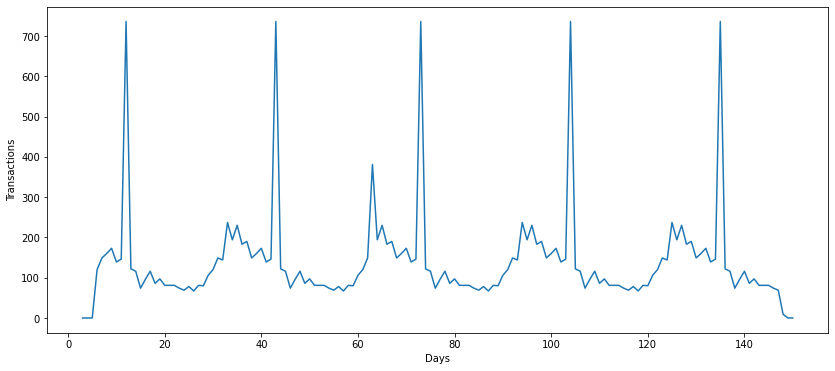

In [4]:
# Charting the trends in day-to-day transactions

plt.figure(figsize=(14,6))
plt.plot(problem['y_data'])
plt.xlabel('Days')
plt.ylabel('Transactions')
plt.show()

In [5]:
# Creating a common dataframe

train_data = X.join(Y)
train_data

,Channel 1,Channel 2,Channel 3,Channel 4,Channel 5,Channel 6,Channel 7,Channel 8,Channel 9,Channel 10,Sine_Feacyc_Week,Cosine_Feacyc_Week,Transactions
3,93.9909,670.77,227.6126,0.0000,670.15,96.984400,345.938308,70.350616,51.0,0.0,0.120476,0.992716,0.0
4,153.2981,746.61,219.0309,0.0000,745.89,324.223378,456.543814,367.624600,0.0,0.0,0.120476,0.992716,0.0
5,138.1257,597.05,307.6223,0.0000,596.18,159.000470,185.720094,231.614080,119.0,0.0,0.120476,0.992716,0.0
6,96.7697,485.72,312.6972,30.1782,484.45,267.656002,93.758074,208.648624,170.0,0.0,0.120476,0.992716,120.0
7,71.9131,531.16,291.7255,48.4959,529.22,132.927754,282.584170,305.160904,181.0,60.0,0.120476,0.992716,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0.0000,2433.19,0.0000,0.0000,2430.44,184.376846,164.990178,316.039570,0.0,42.0,0.569123,-0.822252,74.0
147,0.0000,1895.48,0.0000,0.0000,1895.04,68.176422,104.941768,144.498912,0.0,44.0,0.569123,-0.822252,69.0
148,0.0000,1160.86,0.0000,0.0000,1159.34,581.261934,307.760376,540.985288,0.0,16.0,0.569123,-0.822252,9.0
149,0.0000,773.49,0.0000,0.0000,771.55,113.295628,120.218550,146.768048,0.0,0.0,0.569123,-0.822252,0.0


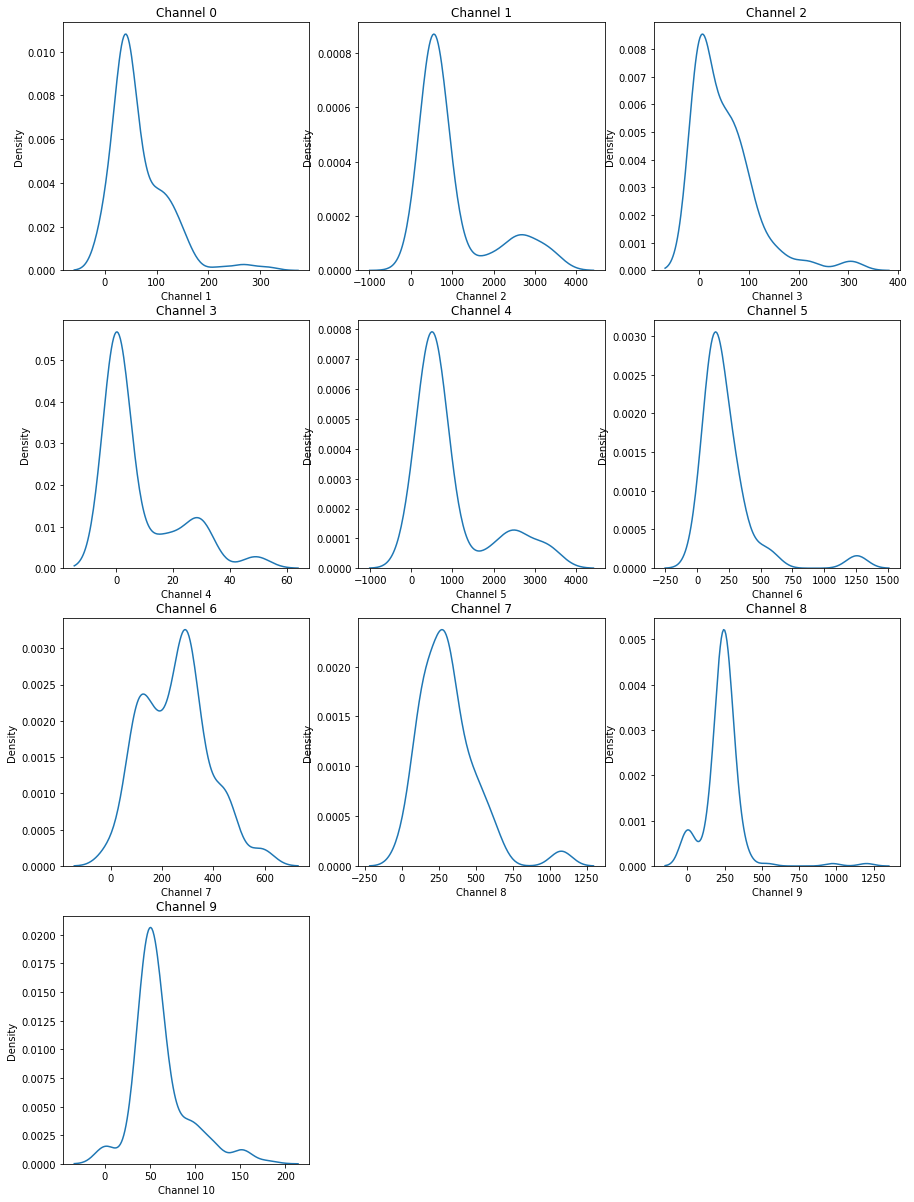

In [6]:
# Probability density distributions for the 10 different channels 

import seaborn as sns

plt.figure(figsize = (15, 21))
for i,j in enumerate([0,1,2,3,4,5,6,7,8,9]):
    temp_data = train_data.iloc[:, j]
    plt.subplot(4, 3, i+1)
    sns.kdeplot(temp_data, legend = False)
    plt.title("Channel " + str(j))
plt.show()

In [7]:
xgbr = problem['function']
xgbr

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [8]:
# Feature importance identification 
feature_importance = xgbr.feature_importances_
feature_importance.sum()

1.0000001

In [9]:
num_features = feature_importance.shape[0]
num_features

12

In [10]:
# Sorting the features in descending order
indices = np.argsort(feature_importance)[::-1]

In [11]:
feature_names = {0:'Channel 1', 1:'Channel 2', 2:'Channel 3', 3:'Channel 4', 4:'Channel 5',
                 5:'Channel 6', 6:'Channel 7', 7:'Channel 8', 8:'Channel 9', 9:'Channel 10', 
                 10: 'Sine_Feacyc_week', 11: 'Cosine_Feacyc_Week'}

# Reorder dict by descending feature importance
for key in indices:
    feature_names[key] = feature_names.pop(key)

features = list(feature_names.values())

In [12]:
# Most significant feature
feature_importance[9]

0.9484494

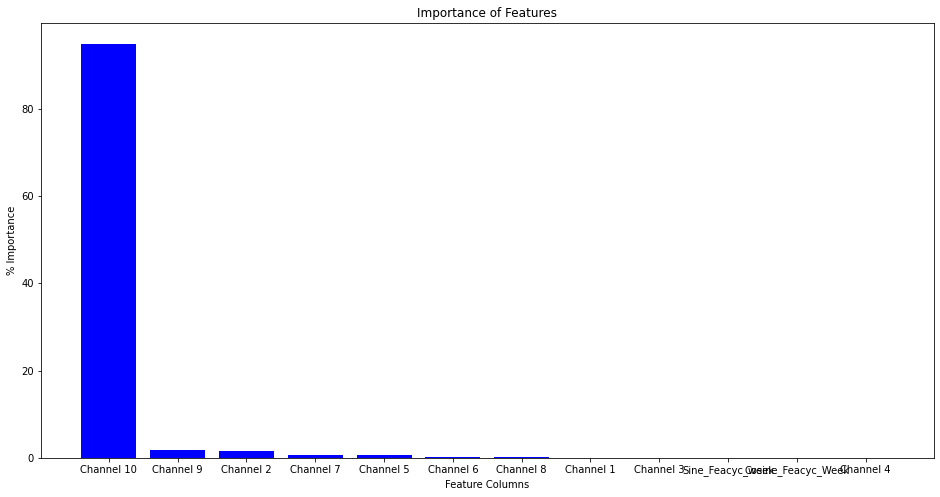

In [13]:
# Significance of the different features

plt.figure(figsize = (16, 8))
plt.title('Importance of Features')

plt.bar(range(num_features), feature_importance[indices] * 100, color = 'blue', align = 'center')
plt.xticks(range(num_features), features)
plt.xlabel('Feature Columns')
plt.ylabel('% Importance')
# plt.xlim(-1, num_features)
plt.show()

In [131]:
''' In the above feature importance chart, Channel 10 has the most influence on the number of transactions. 
    Channels 9 and 2 are of extremely little significance where as Channels 7, 5, 6, 8, 1, 3, 4 are negligible and carry next to
    no importance. The Sine and Cosine cyclic features are dependant features.'''

' In the above feature importance chart, Channel 10 has the most influence on the number of transactions. \n    Channels 9 and 2 are of extremely little significance where as Channels 7, 5, 6, 8, 1, 3, 4 are negligible and carry next to\n    no importance. The Sine and Cosine cyclic features are dependant features.'

In [134]:
# Only the 2nd, 9th and 10th channel shall be used for predicting the no. of transactions

new_data = train_data.drop(['Channel 1' , 'Channel 3' , 'Channel 4', 'Channel 5', 'Channel 6', 'Channel 7', 
                            'Channel 8', 'Sine_Feacyc_Week', 'Cosine_Feacyc_Week'], axis=1)
new_data

,Channel 2,Channel 9,Channel 10,Transactions
3,670.77,51.0,0.0,0.0
4,746.61,0.0,0.0,0.0
5,597.05,119.0,0.0,0.0
6,485.72,170.0,0.0,120.0
7,531.16,181.0,60.0,149.0
...,...,...,...,...
146,2433.19,0.0,42.0,74.0
147,1895.48,0.0,44.0,69.0
148,1160.86,0.0,16.0,9.0
149,773.49,0.0,0.0,0.0


In [135]:
# Extracting an array from the dataframe
values = new_data.values
values

array([[ 670.77,   51.  ,    0.  ,    0.  ],
       [ 746.61,    0.  ,    0.  ,    0.  ],
       [ 597.05,  119.  ,    0.  ,    0.  ],
       [ 485.72,  170.  ,    0.  ,  120.  ],
       [ 531.16,  181.  ,   60.  ,  149.  ],
       [ 640.76,  184.  ,   56.  ,  160.  ],
       [ 453.22,  148.  ,   78.  ,  173.  ],
       [ 585.28,  163.  ,   92.  ,  139.  ],
       [ 572.56,  161.  ,   44.  ,  146.  ],
       [ 590.39,  154.  ,  152.  ,  736.  ],
       [ 694.59,  150.  ,   54.  ,  122.  ],
       [ 556.3 ,  164.  ,   60.  ,  116.  ],
       [ 371.73,  136.  ,   38.  ,   74.  ],
       [ 332.5 ,  137.  ,   48.  ,   96.  ],
       [ 427.46,  369.7 ,   56.  ,  116.  ],
       [ 384.88,  292.15,   50.  ,   86.  ],
       [2583.09,  280.19,   54.  ,   97.  ],
       [2769.88,  250.49,   58.  ,   81.  ],
       [3123.8 ,  307.2 ,   40.  ,   81.  ],
       [3418.25,  227.03,   48.  ,   81.  ],
       [2433.19,  194.84,   42.  ,   74.  ],
       [1895.48,  237.01,   44.  ,   69.  ],
       [11

In [136]:
# Transforming a time series dataset into a supervised learning dataset

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    print(data.shape)
    #n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data, columns=['Channel 2', 'Channel 9', 'Channel 10', 'Transactions']) 
    #print(df)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(1))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-1))
        # put it all together
    agg = pd.concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

In [137]:
train = series_to_supervised(values[118:,], n_in=30)
preds = list()

# Training a new Extreme Gradient Boosting Regressor Model for predicting out-of-sample transactions for the next 15 days
# Infering from the charted trends, each day's transaction amount is assumed to be dependant on the previous 30 days' values

for i in range(15):
    # Split into input and output columns
    trainX, trainY = train[:, :-1], train[:, -1]
    
    #print(trainX[1])
    model = XGBRegressor(objective='reg:squarederror', n_estimators = 100, learning_rate = 0.300012)
    model.fit(trainX, trainY)
    
    # Construct an input for a new prediction
    row = values[-30:].flatten()
    row = np.append(row, train[i+1][:3])
    
    # Make one-step prediction at a time
    yhat = model.predict(np.asarray([row]))
    print("Input: %s, Predicted: %.3f" %(row, yhat[0]))
    preds.append(yhat[0])

# After each iteration of hyper-parameter tuning, the sum of the 15 predictions is stored in an array and 
# the sum of all predictions is calculated. Only the outcome with the maximum sum of predictions is chosen.

#values = np.append(values, yhat)

(30, 4)
Input: [ 475.73  247.83   66.    106.    554.66  344.61   42.    120.    664.86
  361.34   74.    149.    530.24  292.93   58.    144.    531.91  264.25
  122.    237.    670.77  234.54   98.    194.    746.61  241.6   116.
  230.    597.05  243.72  100.    183.    485.72  242.22   60.    190.
  531.16  279.64   60.    149.    640.76  307.72   56.    160.    453.22
  172.39   78.    173.    585.28  258.46   92.    139.    572.56  234.01
   44.    146.    590.39  244.16  152.    736.    694.59  287.04   54.
  122.    556.3   301.78   60.    116.    371.73    0.     38.     74.
  332.5     0.     48.     96.    427.46    0.     56.    116.    384.88
    0.     50.     86.   2583.09    0.     54.     97.   2769.88    0.
   58.     81.   3123.8     0.     40.     81.   3418.25    0.     48.
   81.   2433.19    0.     42.     74.   1895.48    0.     44.     69.
 1160.86    0.     16.      9.    773.49    0.      0.      0.      0.
    0.      0.      0.    554.66  344.61   42.  ], P

Input: [ 475.73  247.83   66.    106.    554.66  344.61   42.    120.    664.86
  361.34   74.    149.    530.24  292.93   58.    144.    531.91  264.25
  122.    237.    670.77  234.54   98.    194.    746.61  241.6   116.
  230.    597.05  243.72  100.    183.    485.72  242.22   60.    190.
  531.16  279.64   60.    149.    640.76  307.72   56.    160.    453.22
  172.39   78.    173.    585.28  258.46   92.    139.    572.56  234.01
   44.    146.    590.39  244.16  152.    736.    694.59  287.04   54.
  122.    556.3   301.78   60.    116.    371.73    0.     38.     74.
  332.5     0.     48.     96.    427.46    0.     56.    116.    384.88
    0.     50.     86.   2583.09    0.     54.     97.   2769.88    0.
   58.     81.   3123.8     0.     40.     81.   3418.25    0.     48.
   81.   2433.19    0.     42.     74.   1895.48    0.     44.     69.
 1160.86    0.     16.      9.    773.49    0.      0.      0.      0.
    0.      0.      0.    453.22  172.39   78.  ], Predicted

In [138]:
sum(preds)

3138.938766479492

In [20]:
pred_array = np.array(preds)
pred_array

array([135.78162, 149.00023, 156.86607, 232.11134, 188.68378, 233.97107,
       184.092  , 184.22353, 153.96257, 155.8544 , 173.05965, 174.71454,
       142.74931, 735.9989 , 137.86977], dtype=float32)

In [106]:
first_column = new_data.pop('Transactions')  
# insert column using insert(position, column_name, first_column) function
new_data.insert(0, 'Transactions', first_column)
new_data

,Transactions,Channel 2,Channel 9,Channel 10
3,0.0,670.77,51.0,0.0
4,0.0,746.61,0.0,0.0
5,0.0,597.05,119.0,0.0
6,120.0,485.72,170.0,0.0
7,149.0,531.16,181.0,60.0
...,...,...,...,...
146,74.0,2433.19,0.0,42.0
147,69.0,1895.48,0.0,44.0
148,9.0,1160.86,0.0,16.0
149,0.0,773.49,0.0,0.0


In [140]:
# In an effort to minimize expenditure, only channel 10 will be continued for advertising
new_dataframe = new_data.drop(columns=['Channel 2', 'Channel 9'])

# The amount of transactions becomes our new feature and Channel 10 is the new target field
new_dataframe

,Channel 10,Transactions
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,120.0
7,60.0,149.0
...,...,...
146,42.0,74.0
147,44.0,69.0
148,16.0,9.0
149,0.0,0.0


In [161]:
#new_data = new_data.drop(new_data[new_data['Transactions'] == 0].index, inplace=True)

x_data = new_dataframe.iloc[:,1]
y_data = new_dataframe.iloc[:,0]
x_data = pd.DataFrame(data = x_data, columns=['Transactions'])
y_data = pd.DataFrame(data = y_data, columns=['Channel 10'])

In [163]:
y_data

,Channel 10
3,0.0
4,0.0
5,0.0
6,0.0
7,60.0
...,...
146,42.0
147,44.0
148,16.0
149,0.0


In [164]:
x_data.shape

(148, 1)

In [165]:
# Performing linear regression to predict expenditure for forecasted 15 days' transactions

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [166]:
# x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state =0 )

In [167]:
# Training model
model = LinearRegression().fit(x_data, y_data)

In [168]:
y_pred = model.predict(x_data)
y_pred

array([[ 33.20913714],
       [ 33.20913714],
       [ 33.20913714],
       [ 57.40800423],
       [ 63.25606378],
       [ 65.47429326],
       [ 68.0958372 ],
       [ 61.23949152],
       [ 62.6510921 ],
       [181.6288553 ],
       [ 57.81131868],
       [ 56.60137533],
       [ 48.13177185],
       [ 52.56823081],
       [ 56.60137533],
       [ 50.55165856],
       [ 52.76988804],
       [ 49.54337243],
       [ 49.54337243],
       [ 49.54337243],
       [ 48.13177185],
       [ 47.12348572],
       [ 48.93840075],
       [ 46.72017127],
       [ 49.54337243],
       [ 49.3417152 ],
       [ 54.58480307],
       [ 57.40800423],
       [ 63.25606378],
       [ 62.24777765],
       [ 81.00189965],
       [ 72.33063894],
       [ 79.59029906],
       [ 70.11240945],
       [ 71.52401003],
       [ 63.25606378],
       [ 65.47429326],
       [ 68.0958372 ],
       [ 61.23949152],
       [ 62.6510921 ],
       [181.6288553 ],
       [ 57.81131868],
       [ 56.60137533],
       [ 48

Training r2 score: 0.4910521445587732


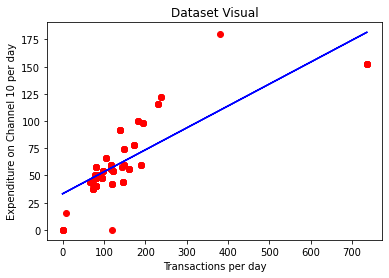

In [170]:
# Plotting 

plt.scatter(x_data, y_data, c='red', label='Scatter')
plt.plot(x_data, model.predict(x_data), c='blue', label='Plot')
plt.title('Dataset Visual')
plt.xlabel('Transactions per day')
plt.ylabel('Expenditure on Channel 10 per day') 
plt.legend

print('Training r2 score:',r2_score(y_pred, y_data))

In [116]:
# Storing the earlier forecasted transactions in a dataframe

future_transactions = pd.DataFrame(data=pred_array, columns=['Transactions'])
future_transactions

,Transactions
0,135.781616
1,149.000229
2,156.866074
3,232.111343
4,188.683777
5,233.971069
6,184.091995
7,184.223526
8,153.962570
9,155.854401


In [117]:
# Storing the predicted expenditure in a dataframe

future_expenses = model.predict(future_transactions)
future_expenses = pd.DataFrame(data=future_expenses, columns=['Expenses'])
future_expenses

,Expenses
0,60.590481
1,63.256110
2,64.842314
3,80.016067
4,71.258584
5,80.391094
6,70.332618
7,70.359142
8,64.256802
9,64.638303


In [281]:
forecast = future_expenses.join(future_transactions)
forecast

,Expenses,Transactions
0,60.590481,135.781616
1,63.256110,149.000229
2,64.842314,156.866074
3,80.016067,232.111343
4,71.258584,188.683777
5,80.391094,233.971069
6,70.332618,184.091995
7,70.359142,184.223526
8,64.256802,153.962570
9,64.638303,155.854401


In [250]:
# The original amount of transactions pper day from the dataset
Y

,Transactions
0,0.000000
1,0.000000
2,0.000000
3,120.000000
4,149.000000
...,...
158,173.059647
159,174.714539
160,142.749313
161,735.998901


In [175]:
# Appending forecasted transactions to the original data

Y = Y.append(future_transactions, ignore_index = True)
Y.shape

(163, 1)

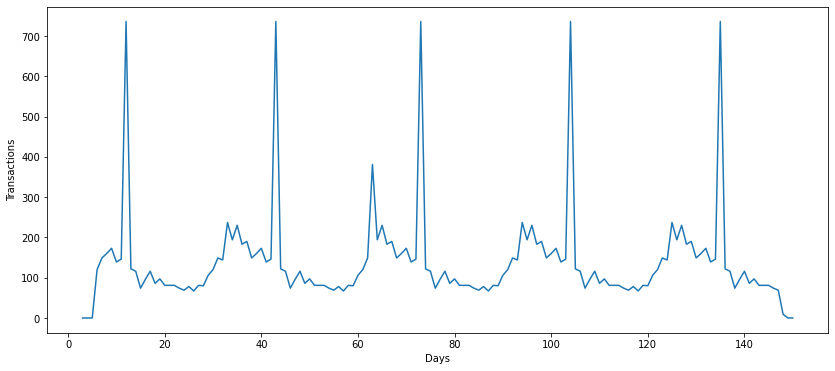

In [252]:
# The new transactions continue following the trend uniformly

plt.figure(figsize=(14,6))
plt.plot(Y)
plt.xlabel('Days')
plt.ylabel('Transactions')
plt.show()

In [282]:
forecast['Date'] = pd.date_range(start='6/1/2021', periods=len(forecast), freq='D')
forecast

,Expenses,Transactions,Date
0,60.590481,135.781616,2021-06-01
1,63.256110,149.000229,2021-06-02
2,64.842314,156.866074,2021-06-03
3,80.016067,232.111343,2021-06-04
4,71.258584,188.683777,2021-06-05
5,80.391094,233.971069,2021-06-06
6,70.332618,184.091995,2021-06-07
7,70.359142,184.223526,2021-06-08
8,64.256802,153.962570,2021-06-09
9,64.638303,155.854401,2021-06-10


In [283]:
first_column = forecast.pop('Date')  
# insert column using insert(position, column_name, first_column) function
forecast.insert(0, 'Date', first_column)
forecast

,Date,Expenses,Transactions
0,2021-06-01,60.590481,135.781616
1,2021-06-02,63.256110,149.000229
2,2021-06-03,64.842314,156.866074
3,2021-06-04,80.016067,232.111343
4,2021-06-05,71.258584,188.683777
5,2021-06-06,80.391094,233.971069
6,2021-06-07,70.332618,184.091995
7,2021-06-08,70.359142,184.223526
8,2021-06-09,64.256802,153.962570
9,2021-06-10,64.638303,155.854401


In [268]:
# Adding columns for sine and cosine cyclic values
forecast['Sine_Feacyc_Week'] = ''
forecast['Cosine_Feacyc_Week'] = ''

In [274]:
sin_dict = []
cos_dict = []

for i in range(1,53):
    sin = np.sin((2*3.14)/(52)*i)
    sin_dict.append(sin)
    cos = np.cos((2*3.14)/(52)*i)
    cos_dict.append(cos)

forecast["Sine_Feacyc_Week"] = forecast["Date"].dt.week.replace(sin_dict)
forecast["Cosine_Feacyc_Week"] = forecast["Date"].dt.week.replace(cos_dict)

forecast

<ipython-input-274-eabe6c1e0b93>:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  forecast["Sine_Feacyc_Week"] = forecast["Date"].dt.week.replace(sin_dict)
<ipython-input-274-eabe6c1e0b93>:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  forecast["Cosine_Feacyc_Week"] = forecast["Date"].dt.week.replace(cos_dict)


,Date,Expenses,Transactions,Sine_Feacyc_Week,Cosine_Feacyc_Week
0,2021-06-01,60.590481,135.781616,22,22
1,2021-06-02,63.256110,149.000229,22,22
2,2021-06-03,64.842314,156.866074,22,22
3,2021-06-04,80.016067,232.111343,22,22
4,2021-06-05,71.258584,188.683777,22,22
5,2021-06-06,80.391094,233.971069,22,22
6,2021-06-07,70.332618,184.091995,23,23
7,2021-06-08,70.359142,184.223526,23,23
8,2021-06-09,64.256802,153.962570,23,23
9,2021-06-10,64.638303,155.854401,23,23


In [280]:
print(sin_dict[21],sin_dict[22],sin_dict[23])
print(cos_dict[21],cos_dict[22],cos_dict[23])

0.4659160167582191 0.35592186583920665 0.24074282728201202
-0.8848289469316399 -0.9345157170521734 -0.970588940340999
